In [12]:
import json
import os
import pickle
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import tabulate
from tqdm import tqdm_notebook as tqdm

import numpy as np
from itertools import cycle, islice


In [13]:
fig_width = 6
fig_height = 5

params = {
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 12,
    #'text.fontsize': 8, # was 10
    'legend.fontsize': 12, # was 10
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,
    'figure.figsize': [fig_width,fig_height],
    'font.family': 'serif',
    'grid.linestyle': '--',
}

matplotlib.rcParams.update(params)

In [14]:
data_dir = '.'
datasets =  ['dataset1','dataset2']
bisimDepths = [0,1,2]
suffix = ''

model_dtype = pd.api.types.CategoricalDtype(categories=['Model-A', 'Model-B',
                                                     'Model-C', 'Model-D', 'Model-E', 'Model-F',
                                                     'Model-G'], ordered=True)

config_dtype = pd.api.types.CategoricalDtype(categories=['SQ - 1k', 'SQ - 100k', 'SQ - 200k', 'CQ - 1k', 'CQ - 100k', 'SchemEX+U+oI',
                                                     'CQ - 200k'], ordered=True)


    k    model     config    f1
0   0  Model-A    SQ - 1k   NaN
1   0  Model-A  SQ - 100k   NaN
2   0  Model-A  SQ - 200k   NaN
3   0  Model-B    SQ - 1k   NaN
4   0  Model-B  SQ - 100k   NaN
5   0  Model-B  SQ - 200k   NaN
6   0  Model-C    SQ - 1k  0.56
7   0  Model-C  SQ - 100k  0.57
8   0  Model-C  SQ - 200k  0.58
9   0  Model-D    SQ - 1k  0.56
10  0  Model-D  SQ - 100k  0.57
11  0  Model-D  SQ - 200k  0.58
12  0  Model-E    SQ - 1k  0.56
13  0  Model-E  SQ - 100k  0.57
14  0  Model-E  SQ - 200k  0.58
15  0  Model-F    SQ - 1k  0.44
16  0  Model-F  SQ - 100k  0.47
17  0  Model-F  SQ - 200k  0.47
18  0  Model-G    SQ - 1k  0.57
19  0  Model-G  SQ - 100k  0.59
20  0  Model-G  SQ - 200k  0.60
21  0  Model-A    CQ - 1k  0.00
22  0  Model-A  CQ - 100k  0.00
23  0  Model-A  CQ - 200k  0.00
24  0  Model-B    CQ - 1k  0.00
25  0  Model-B  CQ - 100k  0.00
26  0  Model-B  CQ - 200k  0.00
27  0  Model-C    CQ - 1k   NaN
28  0  Model-C  CQ - 100k   NaN
29  0  Model-C  CQ - 200k   NaN
30  0  M

/home/till/GIT/visualize-experiments/grouped-bar-charts/env/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/till/GIT/visualize-experiments/grouped-bar-charts/env/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


     k    model     config    f1
84   2  Model-A    SQ - 1k   NaN
85   2  Model-A  SQ - 100k   NaN
86   2  Model-A  SQ - 200k   NaN
87   2  Model-B    SQ - 1k   NaN
88   2  Model-B  SQ - 100k   NaN
89   2  Model-B  SQ - 200k   NaN
90   2  Model-C    SQ - 1k  0.49
91   2  Model-C  SQ - 100k  0.50
92   2  Model-C  SQ - 200k  0.50
93   2  Model-D    SQ - 1k  0.49
94   2  Model-D  SQ - 100k  0.49
95   2  Model-D  SQ - 200k  0.50
96   2  Model-E    SQ - 1k  0.35
97   2  Model-E  SQ - 100k  0.36
98   2  Model-E  SQ - 200k  0.36
99   2  Model-F    SQ - 1k  0.41
100  2  Model-F  SQ - 100k  0.43
101  2  Model-F  SQ - 200k  0.43
102  2  Model-G    SQ - 1k  0.57
103  2  Model-G  SQ - 100k  0.59
104  2  Model-G  SQ - 200k  0.60
105  2  Model-A    CQ - 1k  0.03
106  2  Model-A  CQ - 100k  0.13
107  2  Model-A  CQ - 200k  0.15
108  2  Model-B    CQ - 1k  0.51
109  2  Model-B  CQ - 100k  0.58
110  2  Model-B  CQ - 200k  0.58
111  2  Model-C    CQ - 1k  0.23
112  2  Model-C  CQ - 100k  0.25
113  2  Mo

config   SQ - 1k  SQ - 100k  SQ - 200k  CQ - 1k  CQ - 100k  CQ - 200k
model                                                                
Model-A      NaN        NaN        NaN     0.04       0.18       0.21
Model-B      NaN        NaN        NaN     0.42       0.44       0.45
Model-C     0.71       0.78       0.78     0.26       0.32       0.33
Model-D     0.59       0.77       0.78     0.11       0.24       0.26
Model-E     0.19       0.21       0.24     0.04       0.05       0.07
Model-F     0.41       0.69       0.70     0.06       0.18       0.19
Model-G     0.67       0.73       0.74     0.16       0.22       0.23


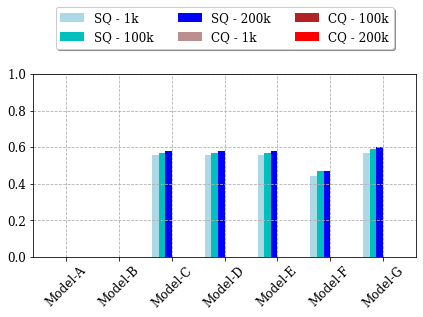

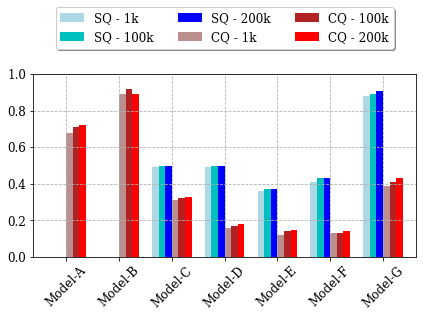

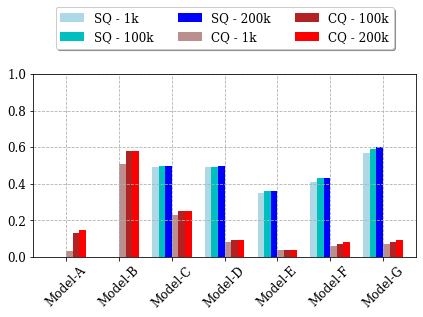

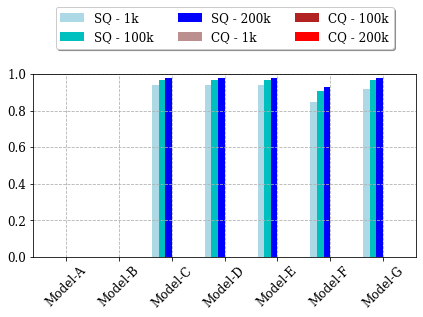

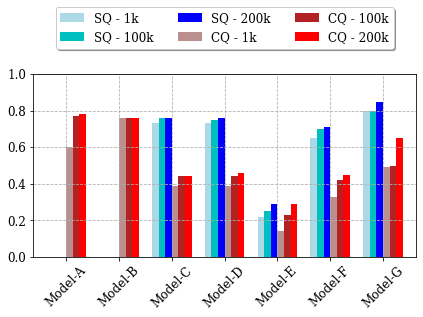

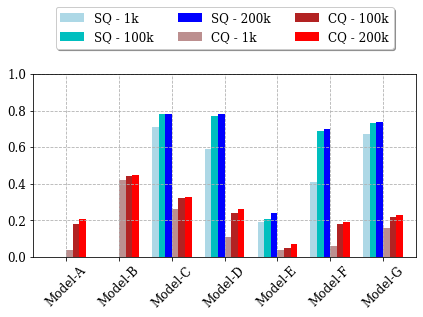

In [15]:
for dataset in datasets:
    for bisimK in bisimDepths:    
        # Load dataframe from CSV
        with open(os.path.join(data_dir, dataset +suffix + '.csv'), 'r') as f:
            df = pd.read_csv(f)
        df.head()
        # fig, ax = plt.subplots(figsize=(15,7))
        kf = df[df['k'] == bisimK]
        print(kf)
        kf['model'] = kf['model'].astype(model_dtype)
        kf['config'] = kf['config'].astype(config_dtype)
        ddf = kf.set_index(['model', 'config'])['f1']
        print(ddf)
        
        print('>>>>>>----------------')

        pdf = ddf.unstack()
        print(pdf)
        pdf = pdf.sort_values(by=['model'], axis=0, ascending=True)
        ax = pdf.plot(kind='bar', color=['lightblue', 'c', 'b', 'rosybrown', 'firebrick', 'red'], width=.75, rot=45)
        ax.set_ylim([0,1])
        # ax.legend(plot_methods.values())
        # ax.set_xticklabels([f'({int(i.left)}, {int(i.right)}]' for i in bins.cat.categories])
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), shadow=True, ncol=3)
        plt.tight_layout()
        plt.grid()
        plt.savefig(dataset + '-'+ str(bisimK) + 'approx.png')